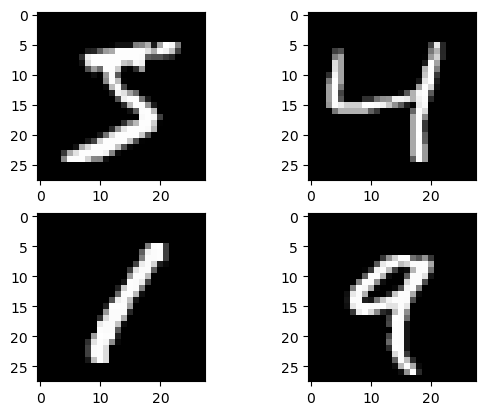

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8716 - loss: 0.4162 - val_accuracy: 0.9418 - val_loss: 0.2038
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9283 - loss: 0.2444 - val_accuracy: 0.9390 - val_loss: 0.2202
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9366 - loss: 0.2267 - val_accuracy: 0.9525 - val_loss: 0.1901
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9408 - loss: 0.2136 - val_accuracy: 0.9531 - val_loss: 0.2032
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9466 - loss: 0.1981 - val_accuracy: 0.9605 - val_loss: 0.1621
313/313 - 0s - 1ms/step - accuracy: 0.9605 - loss: 0.1621

Test accuracy:0.9605000019073486


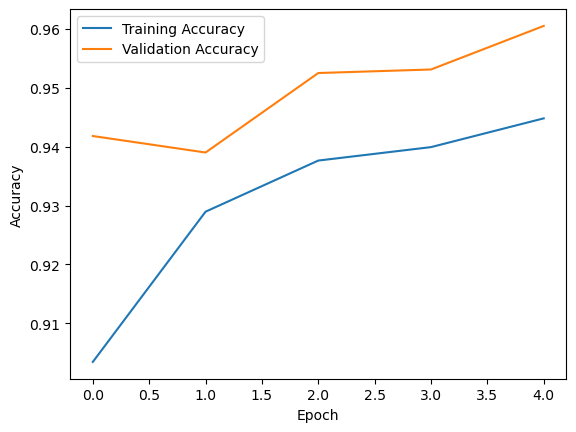

In [3]:
import tensorflow as tf 
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.subplot(221)
plt.imshow(x_train[0] , cmap = plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[2], cmap = plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[3], cmap = plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[4], cmap = plt.get_cmap('gray'))
plt.show()

x_train, x_test = x_train / 255.0, x_test /255.0

model = models.Sequential([layers.Flatten(input_shape=(28,28)),
                           layers.Dense(128, activation='relu'),
                           layers.Dropout(0.2),
                           layers.Dense(10, activation='softmax')])

model.compile(tf.keras.optimizers.Adam(learning_rate = 0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
test_loss, test_acc =model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy:{test_acc}")

plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [5]:
scores = model.evaluate(x_train, y_train)
print("Training Accuracy: %.2f%%\n"% (scores[1]*100))
scores = model.evaluate(x_test, y_test)
print("Testing Accuracy: %.2f%%\n"%(scores[1]*100))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9706 - loss: 0.1009
Training Accuracy: 97.07%

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9546 - loss: 0.1963
Testing Accuracy: 96.05%

